In [1]:
import numpy as np
import pandas as pd
from ast import literal_eval
import os
import seaborn as sns

# TODO: only import used functions
from util.clustering import *

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import json
from tqdm.notebook import tqdm

tqdm.pandas()  # for pandas progress_apply()

# Profiling
import cProfile
import pstats
from io import StringIO

import shutil

In [2]:
# reload sub-modules on change
# UsageError: Line magic function `%` not found. -> make sure it's '%load_ext autoreload' and not '% load_ext autoreload' (with space)
% load_ext autoreload
% autoreload 2

% load_ext line_profiler

sns.set(rc={'figure.figsize': (20, 6)})
sns.set(font_scale=1.5)

## Helper Functions

In [3]:
def get_images_from_imagelist(image_list_path):
    with open(image_list_path, "r") as f:
        return np.array(f.read().splitlines())


def image_name_to_index(fname, imagelist):
    try:
        return int(np.where(imagelist == fname)[0][0])
    except IndexError:
        print("index error: {} not in image list".format(fname))
        return 0

# def get_centroid_idx(idxs, features, top_n=5, distance_metric="cosine"):
#     """
#     Get most central images based on a list of image indices
#     :param idxs: list of imge indices
#     :param features: feature vector of the images. The image indices should be w.r.t these features (e.g. image #2 has feature vector #2)
#         :param top_n: get n most central images
#     :param distance_metric: cosine/euclidean metric for distance comparisons
#     :return: list of indices
#     """
#     features_cluster = features[idxs]
#     # find most central point (=center) in cluster
#     avg_point = np.mean(features_cluster, axis=0)
#
#     # get distance of each image in cluster to the center
#     if distance_metric == "cosine":
#         distances = np.dot(features_cluster, avg_point)
#     else:
#         distances = np.linalg.norm(features_cluster - avg_point, axis=1)
#
#     # get top n most central images based on distance to center
#     indices_cosine_sorted = np.argsort(distances)  # returns indices sorted by ascending sort values
#     if distance_metric == "cosine":
#         # relative = indices are w.r.t to the images in cluster, not all images
#         idxs_relative = indices_cosine_sorted[::-1][:top_n]
#     else:
#         idxs_relative = indices_cosine_sorted[::1][:top_n]
#
#     return np.array(idxs)[idxs_relative]


# Prep

In [4]:
data_path = "Data"
features = np.load(os.path.join(data_path, "feature_vectors.npy"))
image_db = get_images_from_imagelist(os.path.join(data_path, "image_db.txt"))
image_db_folder = os.path.join(data_path, "image_db")
# label_df_project = pd.read_csv("image_labels.csv")

# Convert table structure into dictionary
# grouped_df = label_df_project.groupby('Building')['Image'].apply(list)

output_file = os.path.join("entourage.png")

In [5]:
image_db

array(['1143634721547546281__fAbhSpO6p.jpg',
       '1143636088999702243__fAva1JO7j.jpg',
       '1143639943808347988__fBng5pO9U.jpg',
       '1143643320802335351__fCYp-K9p3.jpg',
       '1144028477144820769__gZ9axJewh.jpg',
       '1144086087329151970__gnDwbuHvi.jpg',
       '1144108085194282133__gsD3iqFSV.jpg',
       '1144203733160720447__hBzupuHg_.jpg',
       '1144243798047118857__hK6v_CtYJ.jpg',
       '1144328947519571759__heR1nGccv.jpg',
       '1144376626304919913__hpHp8Kilp.jpg',
       '1144377533776144781__hpU3FqimN.jpg',
       '1144379499478657530__hpxdyqin6.jpg',
       '1144385236860249808__hrE9JQabQ.jpg',
       '1144385632532572914__hrKtpKiry.jpg',
       '1144388863774043020__hr5u-KiuM.jpg',
       '1144390275434163141__hsORrqivF.jpg',
       '1144391803016457215__hskgWqiv_.jpg',
       '1144411007108524256__hw79jwCjg.jpg',
       '1144414947355142537__hx1TMwCmJ.jpg',
       '1144418993281830676__hywLQxg8U.jpg',
       '1144424016035982044__hz5REQCrc.jpg',
       '11

## Clustering

In [6]:
n_clusters = 5
clustering, labels, labels_freq, clusters, features_pca = perform_clustering(features, n_clusters, pca_components=20)
clusters

{1: array([  3,   8,   9,  10,  11,  12,  13,  14,  15,  16,  18,  20,  23,
         24,  30,  32,  33,  34,  35,  40,  43,  46,  47,  53,  55,  58,
         60,  63,  64,  73,  74,  83,  86,  95,  97, 103, 104, 106, 107,
        108, 109, 110, 111, 112, 115, 119, 120, 129, 130, 131, 132, 134,
        136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149,
        152, 155, 156, 158, 160, 164, 166, 167, 168, 172, 173, 174, 175,
        178, 181, 184, 185, 186, 187, 188, 189, 190, 194, 198, 199, 200,
        201, 203, 204, 206, 208, 209, 210, 212, 213, 217, 218, 220, 221,
        224, 225, 226, 229, 231, 233, 234, 237, 238, 239, 241, 245, 251,
        252, 253, 254, 256, 257, 259, 260, 261, 267, 268, 271, 272, 273,
        274, 275, 276, 277, 279, 281, 286, 287, 288, 291, 294, 295, 298,
        300, 303, 304, 307, 308, 310, 311, 312, 313, 315, 317, 318, 319,
        320, 322, 323, 324, 325, 326, 328, 329, 330, 333, 334, 338, 342,
        343, 344, 345, 347, 348, 349, 350, 351, 

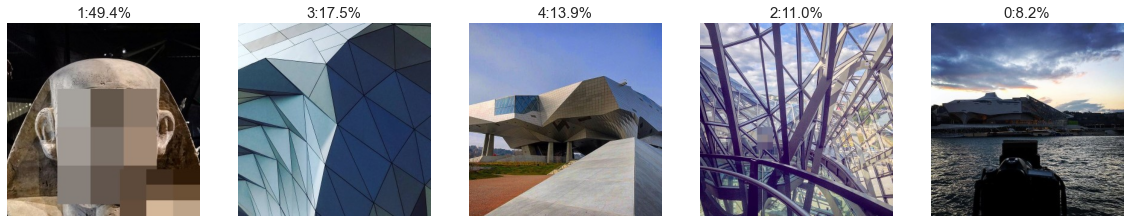

In [7]:
# viz_clusters(clusters, image_db, image_db_folder, show_n_per_cluster=10, show_pics=True, show_centroids="one",features=features)
viz_clusters_compact(clusters, image_db, image_db_folder, features, do_print=False)

In [8]:
macro_cluster_dict = clusters

# Clustering 2D Visualization
Inspired by: http://lab.softwarestudies.com/2015/11/visualizing-high-dimensional-image_16.html
General idea:
1. PCA image feature vectors down to 2 dimensions.
2. For each cluster, pick the most central image (centroid).
3. Start with an empty 2D canvas which is organized in a grid.
4. Each centroid (representing its cluster) gets to pick the closest image to it (closeness = feature vector distance) and put it on the canvas.
5. Repeat 4. until desired plot size is reached.

In [36]:
from PIL import Image


def scale_to_canvas(xy, canvas_size):
    """
    Scales an array of X,Y coordinates to the size of the canvas
    :param xy: np array of dims Nx2
    :param canvas_size: size to scale to
    returns: scaled X,Y coordinates of dims Nx2
    """
    min_vals = xy.min(axis=0)
    max_vals = xy.max(axis=0)

    # Scaling: 1) normalize to 0-1  2) scale to canvas size
    xy_scaled = (xy - min_vals) / (max_vals - min_vals) * canvas_size

    return xy_scaled.astype(int)


def perform_pca(features, n_components=2):
    """Perform PCA and return the transformed features"""
    pca = PCA(n_components=n_components)
    return pca.fit_transform(features)


def order_points_by_centroid_distance(clusters, coords):
    """Sort the points in each cluster by distance to centroid ascending, return sorted indices and coordinates
    :param clusters: dict: {cluster_name: list(point indices), ...}
    :param coords: list of coordinates associated with the points
    :returns: centroid_indices: same structure as clusters but points sorted within each cluster | centroid_coords: dict( 2D array of coords for each cluster)
    """

    centroid_indices = {}
    centroid_coords = {}

    for cluster_name, idxs in clusters.items():
        centroids = get_centroid_idx(idxs, features=coords, top_n=len(idxs), distance_metric="euclidean")
        centroid_indices[cluster_name] = centroids
        centroid_coords[cluster_name] = coords[centroids]

    return centroid_indices, centroid_coords


def plot_images_on_canvas(rounds, centroid_indices, centroid_coords, pad, img_dim, canvas, canvas_size, image_db,
                          image_db_folder):
    """Plot images on a canvas based on centroids.
    TODO: describe params
    """
    xy_taken = []

    for _ in range(rounds):
        for cluster_name in centroid_indices.keys():
            xy = centroid_coords[cluster_name]
            xy_scaled = scale_to_canvas(xy, canvas_size)
            centroids = centroid_indices[cluster_name]
            x, y = xy_scaled[:, 0], xy_scaled[:, 1]

            for i, idx in enumerate(centroids):
                x_img, y_img = int(x[i] + pad[0]), int(y[i] + pad[1])

                if (x_img, y_img) not in xy_taken:
                    img_path = os.path.join(image_db_folder, image_db[idx])
                    img = Image.open(img_path).resize(img_dim)
                    canvas.paste(img, (x_img * img_dim[0], y_img * img_dim[1]))
                    xy_taken.append((x_img, y_img))
                    break
    return canvas


def growing_entourage_plot(features, clusters, image_db, image_db_folder, rounds=1, output_file=""):
    """
    :param clusters: dict of [cluster index]: [image indices] -> not image filenames
    TODO: describe all params
    """

    # Project features down to 2 dimensions
    features_pca_2 = perform_pca(features)

    # how many squares are on the canvas in X, Y direction. Smaller canvas size leads to more clumped clusters
    canvas_size = (70, 70)
    # whitespace at edges of the canvas
    pad = (0, 0)
    # Images will be re-sized to these dimensions
    img_dim = (100, 100)

    n_rows = canvas_size[0] + pad[0] * 2
    n_cols = canvas_size[1] + pad[1] * 2
    canvas = Image.new('RGB', (n_cols * img_dim[0], n_rows * img_dim[1]), color='white')

    centroid_indices, centroid_coords = order_points_by_centroid_distance(clusters, features_pca_2)
    canvas = plot_images_on_canvas(rounds, centroid_indices, centroid_coords, pad, img_dim, canvas, canvas_size,
                                   image_db, image_db_folder)

    # canvas.show()
    if output_file:
        canvas.save(output_file, 'PNG')


rounds = 30

# Profiling: %lprun -f [function_name] [function_call]
growing_entourage_plot(features, macro_cluster_dict, image_db, image_db_folder, rounds, output_file)

